In [2]:
# IMPORT DES LIBRAIRIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import scipy.stats as st
import re

## READ FILE

In [3]:
df = pd.read_excel("./4 - Salaries_Data.xlsx")

## CLONING DATA

In [4]:
data = df

## DATA TYPES

In [5]:
# WHAT ARE THE DIFFERENT TYPES OF DATA IN OUR DATAFRAME :
display(data.dtypes.to_frame())

,0
timestamp,object
company,object
level,object
title,object
totalyearlycompensation,float64
location,object
yearsofexperience,float64
yearsatcompany,float64
tag,object
basesalary,float64


## COLUMNS OPERATIONS


### CREATING NEW COLUMNS FROM PREVIOUS ONES

In [6]:
# CREATING NEW COMPANY & TITLE COLUMN : to add new company column and delete the existing one

data['company_name'] = data['company'].str.upper()
data['title_new'] = data["title"].str.replace(r'Soft Engineer', 'Software Engineer', regex=True)

data.head(2)

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,...,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education,company_name,title_new
0,7/2/2019 16:43:16,Intel,Grade 7,Hardware Engineer,200000.0,"Santa Clara, CA",14.0,3.0,Physical Design,163000.0,...,0.0,1.0,0.0,0.0,0.0,0.0,Asian,NaN,INTEL,Hardware Engineer
1,10/13/2019 11:43:20,Latch,Manager,Software Engineering Manager,170000.0,"New York, NY",6.0,2.0,Full Stack,170000.0,...,0.0,1.0,0.0,0.0,0.0,0.0,Asian,NaN,LATCH,Software Engineering Manager


### DROPPING COLUMNS WE DON'T WANT

In [7]:
# DROPPING IRRELEVANT COLUMNS OR COLUMNS WE ARE NOT USING :

dropped_data = data.drop(["title", "timestamp", "company", "Race_Asian", "Race_White", "Race_Two_Or_More","Race_Black","Race_Hispanic",
                          "Masters_Degree", "Bachelors_Degree", "Doctorate_Degree", "Highschool", "Some_College", "level"], axis=1)

dropped_data.head(2)

,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,stockgrantvalue,bonus,gender,otherdetails,cityid,dmaid,rowNumber,Race,Education,company_name,title_new
0,200000.0,"Santa Clara, CA",14.0,3.0,Physical Design,163000.0,10000.0,27000.0,Female,Asian,7434,807.0,11381,Asian,NaN,INTEL,Hardware Engineer
1,170000.0,"New York, NY",6.0,2.0,Full Stack,170000.0,0.0,0.0,Male,Asian,10182,501.0,16214,Asian,NaN,LATCH,Software Engineering Manager


### RENAMING COLUMNS

In [8]:
# RENAMING COLUMN NAMES FOR MORE CLARITY : 

dropped_data.rename(columns = {'totalyearlycompensation': 'total_yearly_compensation', 'yearsofexperience': 'years_of_experience', 'yearsatcompany': 'years_at_company',
                       'basesalary': 'base_salary', 'stockgrantvalue': 'stock_grant_value', 'cityid': 'city_id','rowNumber': 'row_number', 'dmaid' : 'dma_id', 'Race' : 'race', 'Education' : 'education', 'title_new' : 'title', 'otherdetails' : 'other_details'}, inplace=True)


### REORDERING COLUMNS

In [9]:
# REORDERING OUR DATA FRAME COLUMNS TO MAKE IT MORE READABLE/EXPLOITABLE :

new_columns_order = ["row_number", "company_name", "location", "city_id", "dma_id", "years_of_experience", "years_at_company", "title", "tag", "total_yearly_compensation", "base_salary", "stock_grant_value", "bonus",
                     "gender", "race", "education", "other_details"]
reordered_data = dropped_data[new_columns_order]

reordered_data.head(2)


,row_number,company_name,location,city_id,dma_id,years_of_experience,years_at_company,title,tag,total_yearly_compensation,base_salary,stock_grant_value,bonus,gender,race,education,other_details
0,11381,INTEL,"Santa Clara, CA",7434,807.0,14.0,3.0,Hardware Engineer,Physical Design,200000.0,163000.0,10000.0,27000.0,Female,Asian,NaN,Asian
1,16214,LATCH,"New York, NY",10182,501.0,6.0,2.0,Software Engineering Manager,Full Stack,170000.0,170000.0,0.0,0.0,Male,Asian,NaN,Asian


### LOCATING MISSING DATA

In [39]:
# # OÙ SONT LOCALISEES LES DONNEES MANQUANTES DANS NOTRE DATAFRAME ?

reordered_data.isnull().sum()

# salary_is_null = data.loc[data['base_salary'].isnull(),:]
# salary_is_null.head(10)


row_number                       0
company_name                     5
location                         3
city_id                          0
dma_id                           2
years_of_experience              0
years_at_company                 0
title                            3
tag                            854
total_yearly_compensation        3
base_salary                      1
stock_grant_value                3
bonus                            1
gender                       19540
race                         40215
education                    32272
other_details                22505
dtype: int64

## DROPPING MISSING DATA

### COLUMNS

In [51]:
# MISSING VALUES ARE LESS THAN 2% OF THE REMAINING RELEVANT DATA
# SO WE ARE DROPPING THE CORRESPONDING ROWS

cleaned_data1 = reordered_data.dropna(subset=['company_name'])
cleaned_data2 = cleaned_data1.dropna(subset=['location'])
cleaned_data3 = cleaned_data2.dropna(subset=['dma_id'])
cleaned_data4 = cleaned_data3.dropna(subset=['title'])
cleaned_data5 = cleaned_data4.dropna(subset=['tag'])
cleaned_data6 = cleaned_data5.dropna(subset=['total_yearly_compensation'])
cleaned_data7 = cleaned_data6.dropna(subset=['base_salary'])
cleaned_data8 = cleaned_data7.dropna(subset=['stock_grant_value'])
cleaned_data9 = cleaned_data8.dropna(subset=['bonus'])

data = cleaned_data9

data.isnull().sum()

row_number                       0
company_name                     0
location                         0
city_id                          0
dma_id                           0
years_of_experience              0
years_at_company                 0
title                            0
tag                              0
total_yearly_compensation        0
base_salary                      0
stock_grant_value                0
bonus                            0
gender                       19030
race                         39372
education                    31440
other_details                21792
dtype: int64

### ROWS

In [52]:
# DELETING ROWS FROM WHICH THE COUNTRY IS UNEXPLOITABLE
print(len(data))
      
indices_to_drop1 = data.loc[data['location'] == 'Tel Aviv, Israel'].index
data = data.drop(indices_to_drop1)
print(len(data))

indices_to_drop2 = data.loc[data['years_of_experience'] == 0].index
data = data.drop(indices_to_drop2)
print(len(data))


data.head()

61778
61776
57238


,row_number,company_name,location,city_id,dma_id,years_of_experience,years_at_company,title,tag,total_yearly_compensation,base_salary,stock_grant_value,bonus,gender,race,education,other_details
0,11381,INTEL,"Santa Clara, CA",7434,807.0,14.0,3.0,Hardware Engineer,Physical Design,200000.0,163000.0,10000.0,27000.0,Female,Asian,NaN,Asian
1,16214,LATCH,"New York, NY",10182,501.0,6.0,2.0,Software Engineering Manager,Full Stack,170000.0,170000.0,0.0,0.0,Male,Asian,NaN,Asian
2,19450,INTUIT,"Mountain View, CA",7322,807.0,1.0,1.0,Software Engineer,Web Development (Front-End),134000.0,110000.0,13000.0,11000.0,Male,Asian,NaN,"hispanic, asian, lgbt"
3,21208,GOOGLE,"Sunnyvale, CA",7472,807.0,5.0,5.0,Software Engineer,Distributed Systems (Back-End),400000.0,210000.0,145000.0,45000.0,Male,Asian,PhD,Asian - PhD
4,22644,SPOTIFY,"New York, NY",10182,501.0,8.0,2.5,Software Engineer,Full Stack,210000.0,170000.0,40000.0,0.0,Male,Asian,NaN,ethnicity: south asian


### REPLACING TYPOS

In [53]:
# FROM SOFT ENGINEER => SOFTWARE ENGINEER

data['title'] = data['title'].replace('Soft Engineer', 'Software Engineer')

print(data['title'].value_counts())

data

Software Engineer               36717
Product Manager                  4421
Software Engineering Manager     3518
Data Scientist                   2383
Hardware Engineer                2089
Product Designer                 1482
Technical Program Manager        1371
Solution Architect               1127
Management Consultant             906
Business Analyst                  818
Marketing                         700
Sales                             457
Recruiter                         449
Mechanical Engineer               445
Human Resources                   355
Name: title, dtype: int64


,row_number,company_name,location,city_id,dma_id,years_of_experience,years_at_company,title,tag,total_yearly_compensation,base_salary,stock_grant_value,bonus,gender,race,education,other_details
0,11381,INTEL,"Santa Clara, CA",7434,807.0,14.0,3.0,Hardware Engineer,Physical Design,200000.0,163000.0,10000.0,27000.0,Female,Asian,NaN,Asian
1,16214,LATCH,"New York, NY",10182,501.0,6.0,2.0,Software Engineering Manager,Full Stack,170000.0,170000.0,0.0,0.0,Male,Asian,NaN,Asian
2,19450,INTUIT,"Mountain View, CA",7322,807.0,1.0,1.0,Software Engineer,Web Development (Front-End),134000.0,110000.0,13000.0,11000.0,Male,Asian,NaN,"hispanic, asian, lgbt"
3,21208,GOOGLE,"Sunnyvale, CA",7472,807.0,5.0,5.0,Software Engineer,Distributed Systems (Back-End),400000.0,210000.0,145000.0,45000.0,Male,Asian,PhD,Asian - PhD
4,22644,SPOTIFY,"New York, NY",10182,501.0,8.0,2.5,Software Engineer,Full Stack,210000.0,170000.0,40000.0,0.0,Male,Asian,NaN,ethnicity: south asian
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62636,83865,RAYTHEON TECHNOLOGIES,"Portsmouth, RI",35382,521.0,3.0,3.0,Software Engineer,Distributed Systems (Back-End),95000.0,90000.0,0.0,5000.0,Male,White,Bachelor's Degree,"Title: Software Engineer Ii, Race: White, Acad..."
62638,39475,FACEBOOK,"Seattle, WA",11527,819.0,23.0,6.0,Software Engineering Manager,DevInfra,1733000.0,288000.0,1350.0,95000.0,Male,White,Bachelor's Degree,"Race: White, Academic Level: Bachelorâ€™s degree"
62639,48059,SNAP,"Los Angeles, CA",7275,803.0,5.0,4.0,Software Engineering Manager,Security,1400000.0,235000.0,1165.0,0.0,Male,White,Bachelor's Degree,"Title: Security Engineering Manager, Race: Whi..."
62640,54398,BROADCOM,"San Jose, CA",7422,807.0,21.0,9.0,Marketing,Product,1470000.0,220000.0,1100.0,150000.0,Male,White,Master's Degree,"Title: Director Of Product Marketing, Race: Wh..."


## DEALING WITH OUTLIERS

### METHOD 1 : TINKERING AROUND

In [54]:
# YEARS OF EXPERIENCE
q = data["years_of_experience"].quantile(0.99997)
p = data["years_at_company"].quantile(0.99997)
data = data[data["years_of_experience"] < q]
data = data[data["years_at_company"] < p]
data

# YEARLY COMPENSATION
a = data["total_yearly_compensation"].quantile(0.99994)
data = data[data["total_yearly_compensation"] < a]
b = data["base_salary"].quantile(0.99997)
data = data[data["base_salary"] < b]

# YEARLY BONUS
c = data["bonus"].quantile(0.99997)
data = data[data["bonus"] < c]

### METHOD 2 : TRYING TO IDENTIFY THEM BY VISUALIZATION

Text(0, 0.5, 'Valeurs')

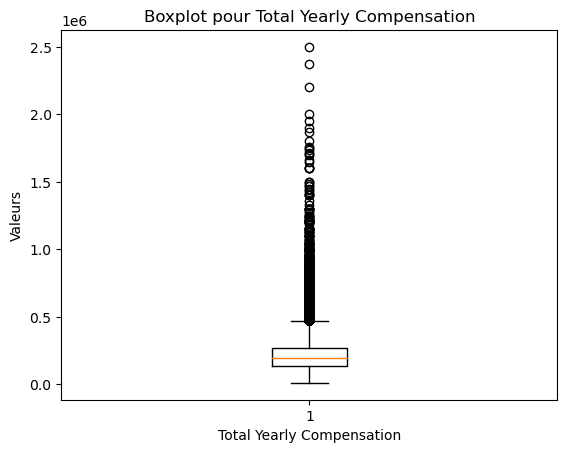

In [55]:
plt.boxplot(data['total_yearly_compensation'])

plt.title('Boxplot pour Total Yearly Compensation')
plt.xlabel('Total Yearly Compensation')
plt.ylabel('Valeurs')

{'whiskers': [<matplotlib.lines.Line2D at 0x22a715a7250>,
 'caps': [<matplotlib.lines.Line2D at 0x22a719dcb20>,
 'boxes': [<matplotlib.lines.Line2D at 0x22a7197d5e0>],
 'medians': [<matplotlib.lines.Line2D at 0x22a71aad0a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x22a71aad340>],
 'means': []}

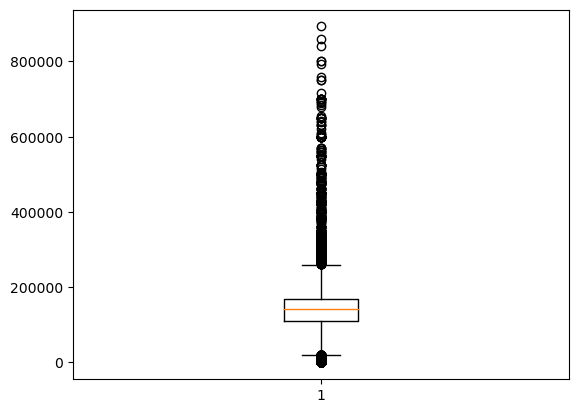

In [56]:
plt.boxplot(data['base_salary'])

### METHOD 3 : LEARNING ABOUT .nlargest()

In [57]:
display(data["total_yearly_compensation"].nlargest(5))
display(data["years_of_experience"].nlargest(5))
display(data["years_at_company"].nlargest(5))
display(data["bonus"].nlargest(5))


53142    2500000.0
12461    2372000.0
53152    2200000.0
53145    2000000.0
53147    1950000.0
Name: total_yearly_compensation, dtype: float64

23104    42.0
23204    42.0
24551    41.0
24608    41.0
12370    40.0
Name: years_of_experience, dtype: float64

21118    34.0
48524    34.0
48243    33.0
53077    33.0
36220    32.0
Name: years_at_company, dtype: float64

21425    630000.0
12819    555000.0
54031    555000.0
19850    550000.0
33716    550000.0
Name: bonus, dtype: float64

In [58]:
missing_values = data['total_yearly_compensation'].isnull()

missing_values

0        False
1        False
2        False
3        False
4        False
         ...  
62636    False
62638    False
62639    False
62640    False
62641    False
Name: total_yearly_compensation, Length: 57227, dtype: bool

In [59]:
# # #Average_salaries

# Business_Analyst = 103505.08
# Data_Scientist = 138054.69
# Hardware_Engineer = 139628.18 
# Human_Resources = 128590.66
# Management Consultant = 136195.7 
# Marketing = 140957.75
# Mechanical_Engineer = 118455.1 
# Product_Designer = 137188.12
# Product_Manager = 148230.71
# Recruiter = 117496.67
# Sales = 118470.72
# Software_Engineer = 132367.29
# Software_Engineering_Manager = 174007.22
# Solution Architect = 140173.51 
# Technical Program Manager = 156454.74

In [60]:

average_yearly_compensation = {
    'Business_Analyst': 103505.08,
    'Data_Scientist': 138054.69,
    'Hardware_Engineer': 139628.18,
    'Human_Resources': 128590.66,
    'Management Consultant': 136195.7,
    'Marketing': 140957.75,
    'Mechanical_Engineer': 118455.1,
    'Product_Designer': 137188.12,
    'Product_Manager': 148230.71,
    'Recruiter': 117496.67,
    'Sales': 118470.72,
    'Software_Engineer': 132367.29,
    'Software_Engineering_Manager': 174007.22,
    'Solution Architect': 140173.51,
    'Technical Program Manager': 156454.74
}

# WHERE ARE THE MISSING VALUES
missing_values = data['total_yearly_compensation'].isnull()

# REPLACE MISSING VALUES IN TITLES WITH CORRESPONDING SALARIES
for index, row in data[missing_values].iterrows():
    title = row['title']
    mean_salary = average_yearly_compensation.get(title)
    if mean_salary is not None:
        data.loc[index, 'total_yearly_compensation'] = mean_salary

# CHECKING IF IT WENT WELL
print(data['total_yearly_compensation'].isnull().sum())


0
